In [50]:
import time
import pandas as pd
import requests
import json
import numpy as np

In [2]:
175 / 5

35.0

In [3]:
# authentification freely based on https://medium.com/swlh/using-python-to-connect-to-stravas-api-and-analyse-your-activities-dummies-guide-5f49727aac86

my_client_id = "54988"
print("(1) Visit this url: http://www.strava.com/oauth/authorize?client_id=" + my_client_id + "&response_type=code&redirect_uri=http://localhost/exchange_token&approval_prompt=force&scope=profile:read_all,activity:read_all")
print("(2) Choose your account, log in and authorize")
time.sleep(0.1)
redirection_url = input("(3) Copy-paste url of the site you are redirected to: ")
redirection_code = redirection_url.partition("code=")[2].partition("&scope")[0]
print("your code is: " + redirection_code)

(1) Visit this url: http://www.strava.com/oauth/authorize?client_id=54988&response_type=code&redirect_uri=http://localhost/exchange_token&approval_prompt=force&scope=profile:read_all,activity:read_all
(2) Choose your account, log in and authorize
(3) Copy-paste url of the site you are redirected to: http://localhost/exchange_token?state=&code=1962ec957decdf7a9b3595520cd3a5749957788e&scope=read,activity:read_all,profile:read_all
your code is: 1962ec957decdf7a9b3595520cd3a5749957788e


In [4]:
# Make Strava auth API call with your 
# client_code, client_secret and code
response = requests.post(
                    url = 'https://www.strava.com/oauth/token',
                    data = {
                            'client_id': my_client_id,
                            'client_secret': '200d05e0963197fb0a4b45351c5f2179c328aefb',
                            'code': redirection_code,
                            'grant_type': 'authorization_code'
                            }
                )
#Save json response as a variable
strava_tokens = response.json()

token = strava_tokens['access_token']
print("your token: " + token)

your token: fa79107c864199ccddbe6f1a8bd4894e4d5e2b91


In [6]:
headers = {"Authorization": "Bearer " + token}
base_url = "https://www.strava.com/api/v3/activities/"
activity_id = "4795291126"

In [7]:
resp = requests.get(base_url + activity_id, headers=headers)
resp.json()

{'resource_state': 3,
 'athlete': {'id': 18636224, 'resource_state': 1},
 'name': 'Lunch Run',
 'distance': 6486.0,
 'moving_time': 1970,
 'elapsed_time': 2001,
 'total_elevation_gain': 26.6,
 'type': 'Run',
 'workout_type': None,
 'id': 4795291126,
 'external_id': 'garmin_push_6280143956',
 'upload_id': 5116840211,
 'start_date': '2021-02-16T10:36:13Z',
 'start_date_local': '2021-02-16T11:36:13Z',
 'timezone': '(GMT+01:00) Europe/Copenhagen',
 'utc_offset': 3600.0,
 'start_latlng': [56.164475, 10.203829],
 'end_latlng': [56.164528, 10.204162],
 'location_city': None,
 'location_state': None,
 'location_country': 'Czech Republic',
 'start_latitude': 56.164475,
 'start_longitude': 10.203829,
 'achievement_count': 0,
 'kudos_count': 1,
 'comment_count': 0,
 'athlete_count': 1,
 'photo_count': 0,
 'map': {'id': 'a4795291126',
  'polyline': '}rxuI{|g}@@EG_ACMU]]Wi@o@cB}A]m@EQe@kCKaAEeARgEA]HuBV_CZeE\\uFl@uDv@wA^i@|@kAbAeATu@R_AP}@Z{Bh@mBKg@aA{@E_@M]]k@}AmAa@]gAy@gAo@eA}@e@SgA}@cAeA_@[a@_@_

In [8]:
resp = requests.get(base_url + activity_id + "/streams?keys=time", headers=headers)
print(resp.json())

[{'type': 'distance', 'data': [0.0, 2.1, 22.4, 25.4, 27.5, 42.4, 50.3, 60.4, 76.7, 88.6, 109.4, 129.8, 151.1, 173.7, 180.1, 182.9, 205.0, 228.4, 249.9, 271.7, 275.4, 285.6, 306.9, 328.6, 334.9, 344.2, 344.7, 344.7, 344.7, 344.7, 360.5, 381.8, 402.5, 424.0, 444.8, 466.0, 487.6, 509.4, 532.6, 547.9, 565.6, 569.5, 583.7, 604.7, 627.5, 648.1, 669.1, 691.7, 713.3, 734.0, 755.9, 777.1, 798.2, 820.5, 842.5, 862.6, 884.1, 905.5, 926.1, 937.7, 959.1, 979.8, 990.2, 1002.7, 1024.2, 1034.9, 1038.4, 1060.4, 1082.0, 1102.6, 1125.6, 1146.4, 1167.9, 1189.9, 1212.6, 1232.9, 1255.4, 1276.4, 1299.1, 1319.7, 1343.0, 1363.3, 1384.6, 1407.0, 1427.6, 1448.8, 1471.9, 1494.7, 1497.5, 1521.5, 1543.8, 1554.9, 1571.7, 1593.7, 1604.4, 1625.3, 1646.1, 1669.1, 1691.1, 1703.9, 1719.1, 1733.7, 1753.8, 1776.6, 1798.0, 1821.6, 1837.7, 1848.0, 1872.2, 1887.4, 1901.9, 1916.3, 1930.6, 1950.9, 1973.6, 1976.9, 1993.0, 2001.5, 2015.8, 2036.3, 2053.3, 2072.5, 2094.4, 2115.3, 2135.3, 2145.7, 2167.0, 2177.6, 2197.7, 2218.4, 2238

In [9]:
# found somewhere on web...
columns = ["time", "latlng", "distance", "altitude", "velocity_smooth", "heartrate", "cadence", "watts", "temp", "moving", "grade_smooth"]

In [10]:
resp = requests.get(base_url + activity_id + "/streams?keys=altitude", headers=headers)
print(resp.json())

[{'type': 'distance', 'data': [0.0, 2.1, 22.4, 25.4, 27.5, 42.4, 50.3, 60.4, 76.7, 88.6, 109.4, 129.8, 151.1, 173.7, 180.1, 182.9, 205.0, 228.4, 249.9, 271.7, 275.4, 285.6, 306.9, 328.6, 334.9, 344.2, 344.7, 344.7, 344.7, 344.7, 360.5, 381.8, 402.5, 424.0, 444.8, 466.0, 487.6, 509.4, 532.6, 547.9, 565.6, 569.5, 583.7, 604.7, 627.5, 648.1, 669.1, 691.7, 713.3, 734.0, 755.9, 777.1, 798.2, 820.5, 842.5, 862.6, 884.1, 905.5, 926.1, 937.7, 959.1, 979.8, 990.2, 1002.7, 1024.2, 1034.9, 1038.4, 1060.4, 1082.0, 1102.6, 1125.6, 1146.4, 1167.9, 1189.9, 1212.6, 1232.9, 1255.4, 1276.4, 1299.1, 1319.7, 1343.0, 1363.3, 1384.6, 1407.0, 1427.6, 1448.8, 1471.9, 1494.7, 1497.5, 1521.5, 1543.8, 1554.9, 1571.7, 1593.7, 1604.4, 1625.3, 1646.1, 1669.1, 1691.1, 1703.9, 1719.1, 1733.7, 1753.8, 1776.6, 1798.0, 1821.6, 1837.7, 1848.0, 1872.2, 1887.4, 1901.9, 1916.3, 1930.6, 1950.9, 1973.6, 1976.9, 1993.0, 2001.5, 2015.8, 2036.3, 2053.3, 2072.5, 2094.4, 2115.3, 2135.3, 2145.7, 2167.0, 2177.6, 2197.7, 2218.4, 2238

In [11]:
activity_df = pd.DataFrame()
for col_name in columns:
    try:
        resp = requests.get(base_url + activity_id + "/streams?keys=" + col_name, headers=headers)
        data_list = resp.json()
        for el in data_list:
            if el["type"] == col_name:
                col_values = el["data"]
                activity_df[col_name] = col_values
    except:
        pass

In [12]:
activity_df

,time,latlng,distance,altitude,velocity_smooth,heartrate,cadence,moving,grade_smooth
0,0,"[56.164475, 10.203829]",0.0,31.6,0.0,90,58,False,-2.7
1,1,"[56.164466, 10.203859]",2.1,31.6,0.0,90,60,True,-2.4
2,8,"[56.164502, 10.204176]",22.4,31.0,2.8,96,76,True,-2.2
3,9,"[56.164516, 10.204219]",25.4,31.0,2.9,103,77,True,-1.7
4,10,"[56.164525, 10.204248]",27.5,31.0,2.8,103,77,True,-0.4
...,...,...,...,...,...,...,...,...,...
377,1978,"[56.164939, 10.204727]",6425.1,30.9,3.1,162,81,True,0.4
378,1985,"[56.164769, 10.204532]",6447.6,30.9,3.3,162,80,True,0.3
379,1994,"[56.164592, 10.204377]",6469.3,30.9,2.8,162,77,True,0.2
380,1997,"[56.164535, 10.204294]",6477.5,31.0,2.5,161,77,True,0.3


<AxesSubplot:xlabel='distance'>

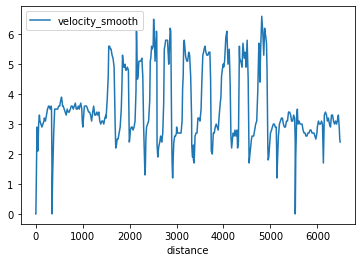

In [13]:
activity_df.plot("distance", "velocity_smooth")

In [17]:
start_dists = activity_df["distance"].tolist()[:10]

[0.0, 2.1, 22.4, 25.4, 27.5, 42.4, 50.3, 60.4, 76.7, 88.6]

In [30]:
interval_meters = 200
start_dist = 25.4

In [58]:
start_time = activity_df[activity_df["distance"]==start_dist]["time"].tolist()[0]
stop_dist_target = start_dist + interval_meters
stop_dist_under = activity_df[activity_df["distance"]<=stop_dist_target]["distance"].tolist()[-1]
stop_time_under = activity_df[activity_df["distance"]<=stop_dist_target]["time"].tolist()[-1]
stop_dist_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["distance"].tolist()[0]
stop_time_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["time"].tolist()[0]

In [59]:
print(start_dist, start_time, stop_dist_target, stop_dist_under, stop_time_under, stop_dist_above, stop_time_above)

25.4 9 225.4 205.0 70 228.4 77


In [60]:
m_above = stop_dist_above - stop_dist_target
m_under = stop_dist_target - stop_dist_under
under_to_target_ratio = m_under / (m_above + m_under)
under_to_target_ratio

0.8717948717948718

In [67]:
time_to_add = np.round(under_to_target_ratio * (stop_time_above - stop_time_under), 3)
time_to_add

6.103

In [68]:
stop_time_final = stop_time_under + time_to_add
stop_time_final

76.103

In [69]:
start_time

9

In [72]:
duration_raw = stop_time_final - start_time
pace_raw = (1000 / interval) * duration_raw
pace = time.strftime('%M:%S', time.gmtime(pace_raw))
start_time = time.strftime('%M:%S', time.gmtime(start_time))

In [75]:
interval = 200

all_intervals = []
for start_dist in activity_df["distance"].tolist():
    if start_dist + interval <= activity_df["distance"].max():
        start_time = activity_df[activity_df["distance"]==start_dist]["time"].tolist()[0]
        stop_dist_target = start_dist + interval_meters
        stop_dist_under = activity_df[activity_df["distance"]<=stop_dist_target]["distance"].tolist()[-1]
        stop_time_under = activity_df[activity_df["distance"]<=stop_dist_target]["time"].tolist()[-1]
        stop_dist_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["distance"].tolist()[0]
        stop_time_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["time"].tolist()[0]
        m_above = stop_dist_above - stop_dist_target
        m_under = stop_dist_target - stop_dist_under
        under_to_target_ratio = m_under / (m_above + m_under)
        time_to_add = np.round(under_to_target_ratio * (stop_time_above - stop_time_under), 3)
        stop_time_final = stop_time_under + time_to_add
        duration_raw = stop_time_final - start_time
        pace_raw = (1000 / interval) * duration_raw
        pace = time.strftime('%M:%S', time.gmtime(pace_raw))
        start_time = time.strftime('%M:%S', time.gmtime(start_time))
        all_intervals.append([interval, start_dist, stop_dist_target, start_time, duration_raw, pace])
all_intervals_df = pd.DataFrame(all_intervals, columns=["interval", "start_dist", "stop_dist","start_time", "duration", "pace"])
all_intervals_df.sort_values("duration", inplace=True)
all_intervals_df.reset_index(inplace=True)
all_intervals_df.drop("index", inplace=True, axis=1)

# select only for those which are not overlapping
intervals_filtered = pd.DataFrame()
n_intervals = 5
covered_tups = []
for n in range(len(all_intervals_df)):
    if len(intervals_filtered) < n_intervals:
        row = all_intervals_df.iloc[n]
        # check whether current start_dist or stop_dist are already covered
        if (not any([tup[0] <= row["start_dist"] <= tup[1] for tup in covered_tups])) and (not any([tup[0] <= row["stop_dist"] <= tup[1] for tup in covered_tups])):
            # if not, add the  current interval to our dataframe
            intervals_filtered = intervals_filtered.append(row)
            covered_tups.append((row["start_dist"], row["stop_dist"]))
intervals_filtered = intervals_filtered[["interval", "start_dist", "stop_dist","start_time", "duration", "pace"]]
intervals_filtered

,interval,start_dist,stop_dist,start_time,duration,pace
0,200.0,4708.1,4908.1,23:14,35.511,02:57
2,200.0,4300.1,4500.1,21:17,37.502,03:07
3,200.0,3522.3,3722.3,17:37,38.315,03:11
7,200.0,3931.0,4131.0,19:30,39.081,03:15
8,200.0,3095.6,3295.6,15:33,39.935,03:19


In [76]:
covered_tups

[(4708.1, 4908.1),
 (4300.1, 4500.1),
 (3522.3, 3722.3),
 (3931.0, 4131.0),
 (3095.6, 3295.6)]

In [78]:
interval = 150

all_intervals = []
for start_dist in activity_df["distance"].tolist():
    if start_dist + interval <= activity_df["distance"].max():
        start_time = activity_df[activity_df["distance"]==start_dist]["time"].tolist()[0]
        stop_dist_target = start_dist + interval
        stop_dist_under = activity_df[activity_df["distance"]<=stop_dist_target]["distance"].tolist()[-1]
        stop_time_under = activity_df[activity_df["distance"]<=stop_dist_target]["time"].tolist()[-1]
        stop_dist_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["distance"].tolist()[0]
        stop_time_above = activity_df[activity_df["distance"]>stop_dist_target][:1]["time"].tolist()[0]
        m_above = stop_dist_above - stop_dist_target
        m_under = stop_dist_target - stop_dist_under
        under_to_target_ratio = m_under / (m_above + m_under)
        time_to_add = np.round(under_to_target_ratio * (stop_time_above - stop_time_under), 3)
        stop_time_final = stop_time_under + time_to_add
        duration_raw = stop_time_final - start_time
        pace_raw = (1000 / interval) * duration_raw
        pace = time.strftime('%M:%S', time.gmtime(pace_raw))
        start_time = time.strftime('%M:%S', time.gmtime(start_time))
        all_intervals.append([interval, start_dist, stop_dist_target, start_time, duration_raw, pace])
all_intervals_df = pd.DataFrame(all_intervals, columns=["interval", "start_dist", "stop_dist","start_time", "duration", "pace"])
all_intervals_df.sort_values("duration", inplace=True)
all_intervals_df.reset_index(inplace=True)
all_intervals_df.drop("index", inplace=True, axis=1)

intervals_filtered = pd.DataFrame()
n_intervals = 5
for n in range(len(all_intervals_df)):
    if len(intervals_filtered) < n_intervals:
        row = all_intervals_df.iloc[n]
        # check whether current start_dist or stop_dist are already covered
        if (not any([tup[0] <= row["start_dist"] <= tup[1] for tup in covered_tups])) and (not any([tup[0] <= row["stop_dist"] <= tup[1] for tup in covered_tups])):
            # if not, add the  current interval to our dataframe
            intervals_filtered = intervals_filtered.append(row)
            covered_tups.append((row["start_dist"], row["stop_dist"]))

intervals_filtered = intervals_filtered[["interval", "start_dist", "stop_dist","start_time", "duration", "pace"]]
intervals_filtered

,interval,start_dist,stop_dist,start_time,duration,pace
1,150.0,2725.6,2875.6,13:32,25.904,02:52
2,150.0,2428.2,2578.2,12:08,26.276,02:55
23,150.0,1521.5,1671.5,07:51,29.091,03:13
25,150.0,2115.3,2265.3,10:37,29.300,03:15
38,150.0,1821.6,1971.6,09:16,30.559,03:23


In [27]:
covered_tups

[(7016.7, 7818.7),
 (3801.4, 4606.8),
 (5417.4, 6222.0),
 (2220.7, 3023.9),
 (4809.1, 5210.1),
 (3202.7, 3609.4),
 (6426.4, 6831.1),
 (1621.5, 2030.4)]